In [2]:
# Import required Python packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report,confusion_matrix

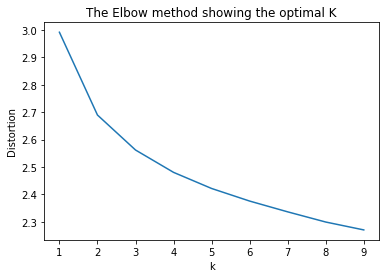

Decision for k is 3


In [3]:
df = pd.read_csv('drug_users.csv')
y_actualLabel = df['CLASS']

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df,kmeanModel.cluster_centers_,'euclidean'),axis=1))/df.shape[0])
plt.plot(K,distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal K')
plt.show()

print('Decision for k is 3')

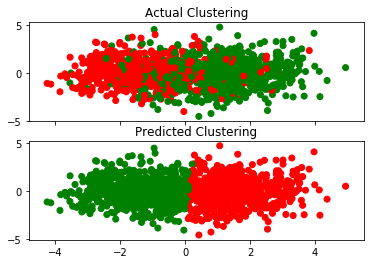

In [5]:
### Created training and testing datasets.

X_train, X_test,y_train, y_test = train_test_split(df.iloc[:,0:12],y_actualLabel,test_size=0.3,random_state=123)

# Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create the KMeans model
kmeanModel = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster index for each sample 
kmeanModel.fit_predict(X_train)

# Model and fit the data to the PCA model
pcaObj = sklearn.decomposition.PCA(n_components=2)
X_std = StandardScaler().fit_transform(X_train)
X_train_pca = pcaObj.fit_transform(X_std)
y_predict_train = kmeanModel.fit_predict(X_train_pca)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in y_predict_train]
old_label_color = [LABEL_COLOR_MAP[l] for l in y_train.values]

f, axarr = plt.subplots(2, sharex=True)


# Plot the scatter digram
axarr[0].scatter(x,y,c=old_label_color)
axarr[0].set_title('Actual Clustering')
axarr[1].scatter(x,y,c = label_color)
axarr[1].set_title('Predicted Clustering');


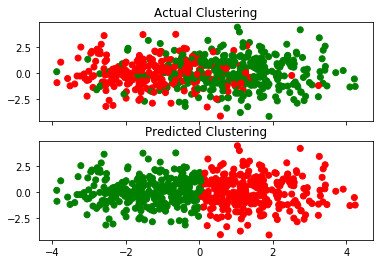

In [8]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
kmeanModel.fit_predict(X_test)
# Model and fit the data to the PCA model
pcaObj = sklearn.decomposition.PCA(n_components=2)
X_std = StandardScaler().fit_transform(X_test)
X_test_pca = pcaObj.fit_transform(X_std)
y_predict_test = kmeanModel.fit_predict(X_test_pca)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
LABEL_COLOR_MAP = {0:'r', 1: 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in y_predict_test]
old_label_color = [LABEL_COLOR_MAP[l] for l in y_test.values]

f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(x,y,c = old_label_color)
axarr[0].set_title('Actual Clustering')
axarr[1].scatter(x,y,c = label_color)
axarr[1].set_title('Predicted Clustering');


###################end code for Task 1-b-3

In [9]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print("Confusion matrix for Test Data")
print(confusion_matrix(y_test,y_predict_test))
print("Confusion matrix for Train Data")
print(confusion_matrix(y_train,y_predict_train))
###################end code for Task 1-b-4

Confusion matrix for Test Data
[[ 32 212]
 [243  79]]
Confusion matrix for Train Data
[[ 86 510]
 [511 212]]
